In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from keras.models import model_from_json
from imgaug import augmenters as ia
import imutils
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

import numpy as np
import matplotlib.pyplot as plt
import time
import os
import cv2

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import backend as k 
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.applications.vgg16 import VGG16
from keras.layers import Input
from keras.utils import to_categorical


Using TensorFlow backend.


In [0]:
data_dir = "/content/drive/My Drive/dataset/fakecurrency_realcurrency/fakecurrrency"


In [0]:
def main(): 
    i = 0
      
    for filename in os.listdir(data_dir): 
        dst = "r" + str(i) + ".jpg"
        src = data_dir + "/" + filename 
        dst = data_dir + "/" + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1

if __name__ == '__main__': 
      
    # Calling main() function 
    main()

In [0]:
real_dir="/content/drive/My Drive/dataset/fakecurrency_realcurrency/realcurrrency"
def main(): 
    i = 0
      
    for filename in os.listdir(real_dir): 
        dst = "r" + str(i) + ".jpg"
        src = real_dir + "/" + filename 
        dst = real_dir + "/" + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  
if __name__ == '__main__': 
      
    # Calling main() function 
    main()


In [0]:
def load_img_data():
    image_path=[]
    for i in range(102):
        image_path.append(os.path.join(data_dir+"/r"+str(i)+'.jpg'))
        
    #now once we get our list we will convrt it to numpy array so that they can be easily manipulated
    image_paths=np.asarray(image_path)
    return image_paths

image_paths=load_img_data()


In [0]:
def load_img_data1():
    image_path1=[]
    for i in range(286):
        image_path1.append(os.path.join(real_dir+"/r"+str(i)+'.jpg'))
        
    #now once we get our list we will convrt it to numpy array so that they can be easily manipulated
    image_paths1=np.asarray(image_path1)
    return image_paths1

image_paths1=load_img_data1()


Text(0.5, 1.0, 'Original image')

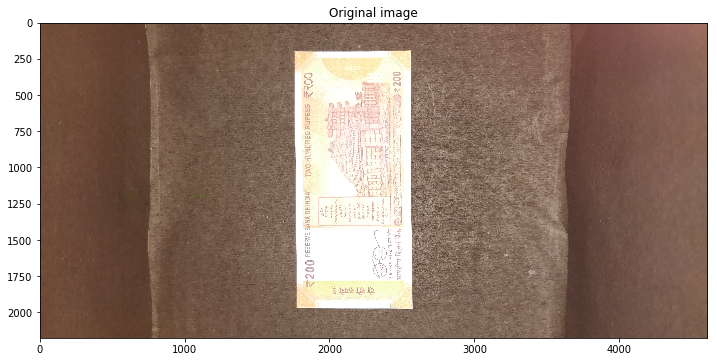

In [0]:
image=image_paths[1]
original_image=mpimg.imread(image)
original_image.shape

image=image_paths[6]
original_image=mpimg.imread(image)
fig,axs=plt.subplots(1,1,figsize=(10,10))
fig.tight_layout()
axs.imshow(original_image)
axs.set_title('Original image')


In [0]:
X_train=[]

def img_preprocess(img):
    #we will read ths image path and store actual image that it contains
    #img=mpimg.imread(img)
    #now we will crop the unnecessary part from the image using slicing in numpy array
    #it contains height width and channel and we are only concerned with cropping the image height
    img=img[:,1500:3000,:]
    img_rotated=[]
    for angle in np.arange(0, 360, 15):
      rotated = imutils.rotate_bound(img, angle)
      #plt.imshow("Rotated (Correct)", rotated)
      img_rotated.append(rotated)
    return img, img_rotated

image=image_paths[6]
original_image=mpimg.imread(image)

Text(0.5, 1.0, 'Preprocessed image')

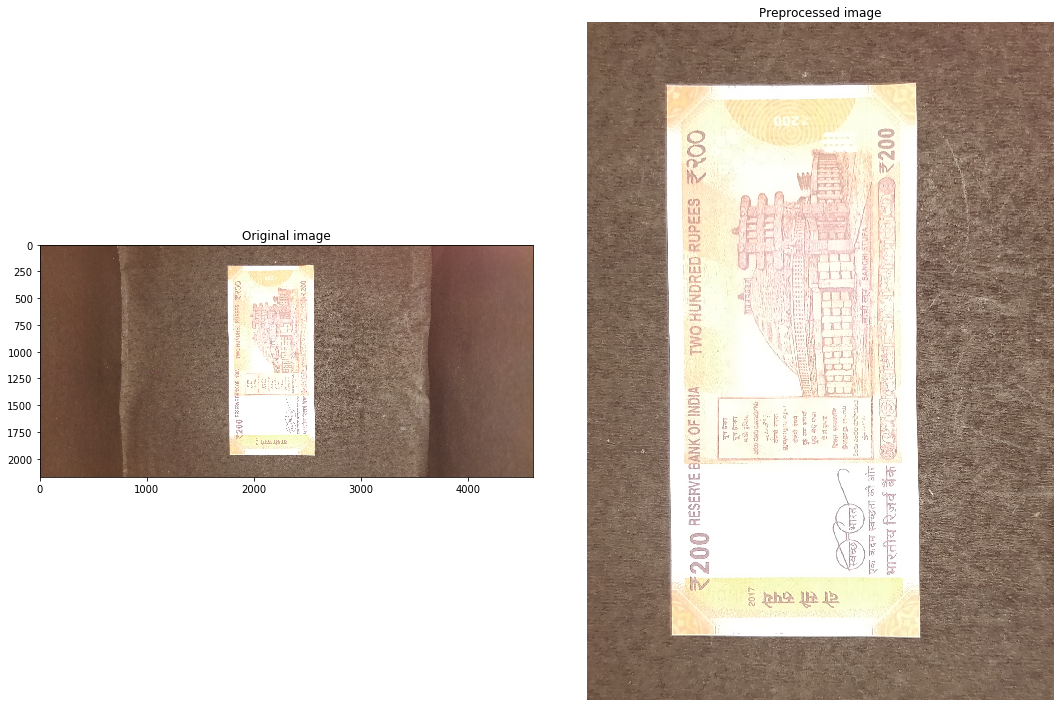

In [0]:

preprocessed_image, rotated_imgs = img_preprocess(original_image)
fig,axs=plt.subplots(1,2,figsize=(15,10))
plt.axis('off')
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')


/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/0.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/1.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/2.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/3.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/4.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/5.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/6.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/7.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/8.jpg
/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/9.jpg
/content/drive/My Drive/dataset/fakecurrency_realc

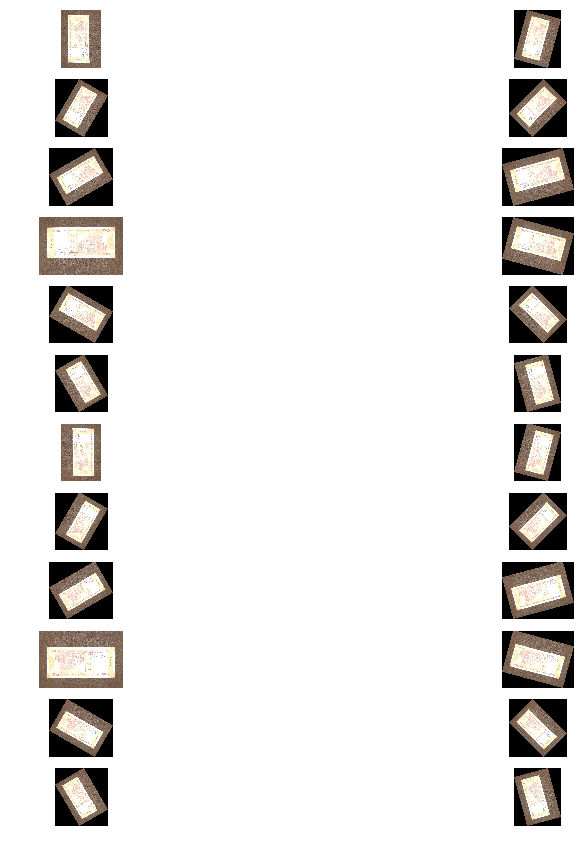

In [0]:
for i in range(0,len(rotated_imgs)):
  path_s="/content/drive/My Drive/dataset/fakecurrency_realcurrency/processed_images_real_currency/"+str(i)+'.jpg'
  cv2.imwrite(path_s,rotated_imgs[i])
  print(path_s)
  
len(rotated_imgs)

f, axarr = plt.subplots(12,2,figsize=(15,15))
fig.tight_layout()

c=0
for i in range(0,12):
  for j in range(0,2):
    axarr[i,j].imshow(rotated_imgs[c])
    axarr[i][j].axis('off')
    c=c+1


In [0]:
# PROJECTIVE TRANSFORMATIONS for ZOOMING IN AND ZOOMING OUT
            # will produce (20 + 20) images for the dataset
            # 1ST ZOOMING IN ...
projective_transform_zoom_in=[]
def projective_transform_zoom_in_():  
#  for i in range(0,len(image_paths)):
  for i in range(0,102):
    image=image_paths[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Projective transformation started....") 
    for step in np.arange(0.005, 0.105, 0.005):
      srcPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]])
      dstPoints = np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]) 
      projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
      imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
      projective_transform_zoom_in.append(imgZoomed)
    print("Done")
    return projective_transform_zoom_in
#    break

In [0]:
# PROJECTIVE TRANSFORMATIONS for ZOOMING IN AND ZOOMING OUT
            # will produce (20 + 20) images for the dataset
            # 1ST ZOOMING IN ...
projective_transform_zoom_in_1_=[]
def projective_transform_zoom_in_1():  
#  for i in range(0,len(image_paths)):
  for i in range(0,286):
    image=image_paths1[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Projective transformation started....") 
    for step in np.arange(0.005, 0.105, 0.005):
      srcPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]])
      dstPoints = np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]) 
      projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
      imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
      projective_transform_zoom_in_1_.append(imgZoomed)
    print("Done")
    return projective_transform_zoom_in_1_
#    break


In [0]:
projective_transform_zoom_out=[]
def projective_transform_zoom_out_():
  for i in range(0,len(image_paths)):
  #for i in range(0,5):
    image=image_paths[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Projective transformation started....")
    for step in np.arange(0.005, 0.105, 0.005):
      srcPoints = np.float32(np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]))
      dstPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]]) 
      projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
      imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
      projective_transform_zoom_out.append(imgZoomed)
    print("Done")
    return projective_transform_zoom_out


In [0]:
projective_transform_zoom_out_1_=[]
def projective_transform_zoom_out_1():
  for i in range(0,len(image_paths1)):
  #for i in range(0,5):
    image=image_paths1[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Projective transformation started....")
    for step in np.arange(0.005, 0.105, 0.005):
      srcPoints = np.float32(np.float32([[0,0], [noOfCols-1,0], [0,noOfRows-1], [noOfCols-1,noOfRows-1]]))
      dstPoints = np.float32([[int(step*(noOfCols-1)),int(step*(noOfRows-1))], [int((1-step)*(noOfCols-1)),int(step*(noOfRows-1))], [int(step*(noOfCols-1)),int((1-step)*(noOfRows-1))], [int((1-step)*(noOfCols-1)), int((1-step)*(noOfRows-1))]]) 
      projective_matrix = cv2.getPerspectiveTransform(srcPoints, dstPoints)
      imgZoomed = cv2.warpPerspective(img, projective_matrix, (noOfCols,noOfRows))
      projective_transform_zoom_out_1_.append(imgZoomed)
    print("Done")
    return projective_transform_zoom_out_1_

In [0]:
translated_img=[]
def translation_():
  for i in range(0,len(image_paths)):
#  for i in range(0,5):
    image=image_paths[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Translating...")
    for x in range(100, -110, -50):
      for y in range(100, -110, -50):
        translationMatrix = np.float32([ [1,0,x], [0,1,y] ])
        imgTrns = cv2.warpAffine(img, translationMatrix, (noOfCols, noOfRows))
        translated_img.append(imgTrns)
    print("Done")
    return translated_img

In [0]:
translated_img_1_=[]
def translation_1():
  for i in range(0,len(image_paths)):
#  for i in range(0,5):
    image=image_paths1[i]
    img=mpimg.imread(image)
    noOfRows, noOfCols = img.shape[:2]
    print("Translating...")
    for x in range(100, -110, -50):
      for y in range(100, -110, -50):
        translationMatrix = np.float32([ [1,0,x], [0,1,y] ])
        imgTrns = cv2.warpAffine(img, translationMatrix, (noOfCols, noOfRows))
        translated_img_1.append(imgTrns)
    print("Done")
    return translated_img_1_
#    break


In [0]:
X_train=[]

def pre_process_f():
  for i in range(0,3):
    image=image_paths[i]
    original_image=mpimg.imread(image)
    preprocessed_image, rotated_imgs = img_preprocess(original_image)
    for j in range(0,len(rotated_imgs)):
      X_train.append(np.asarray(rotated_imgs[j]))
print("Done preprocessing and rotation")
print("Projective transformation zoom in .....")
x1=projective_transform_zoom_in_()
for j in range(0,len(x1)):
  X_train.append(x1[j])
print("Projective transformation zoom in done")
print("Projective transformation zoom out .....")
x2=projective_transform_zoom_out_()
for j in range(0,len(x2)):
  X_train.append(x2[j])
print("Projective transformation zoom out done")
print("Translating....")
x3=translation_()
for j in range(0,len(x3)):
  X_train.append(x3[j])
print("Transltion done....")

Done preprocessing and rotation
Projective transformation zoom in .....
Projective transformation started....
Done
Projective transformation zoom in done
Projective transformation zoom out .....
Projective transformation started....
Done
Projective transformation zoom out done
Translating....
Translating...
Done
Transltion done....


In [0]:
pre_process_f()

In [0]:
len(X_train)

137

In [0]:
X_train_1=[]

In [0]:
def pre_process_f_1():
  for i in range(0,5):
    image=image_paths1[i]
    original_image=mpimg.imread(image)
    preprocessed_image, rotated_imgs = img_preprocess(original_image)
    for j in range(0,len(rotated_imgs)):
      X_train_1.append(np.asarray(rotated_imgs[j]))
print("Done preprocessing and rotation")
print("Projective transformation zoom in .....")
x1=projective_transform_zoom_in_1()
for j in range(0,len(x1)):
  X_train_1.append(x1[j])
print("Projective transformation zoom in done")
print("Projective transformation zoom out .....")
x2=projective_transform_zoom_out_1()
for j in range(0,len(x2)):
  X_train_1.append(x2[j])
print("Projective transformation zoom out done")
print("Translating....")
x3=translation_()
for j in range(0,len(x3)):
  X_train_1.append(x3[j])
print("Transltion done....")


Done preprocessing and rotation
Projective transformation zoom in .....
Projective transformation started....
Done
Projective transformation zoom in done
Projective transformation zoom out .....
Projective transformation started....
Done
Projective transformation zoom out done
Translating....
Translating...
Done
Transltion done....


In [0]:
pre_process_f_1()

In [0]:
len(X_train_1)


210

(137, 224, 224, 3)
(210, 224, 224, 3)
<class 'numpy.ndarray'>
(224, 224, 3)
(347,)


(347, 224, 224, 3)

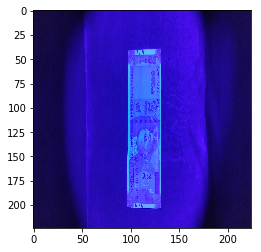

In [0]:
for i in range(0,len(X_train)):
  X_train[i]=cv2.resize(X_train[i],(224,224))

for i in range(0,len(X_train_1)):
  X_train_1[i]=cv2.resize(X_train_1[i],(224,224))

x_train=np.asarray(X_train)
print(x_train.shape)

x_train_1=np.asarray(X_train_1)
print(x_train_1.shape)

plt.imshow(X_train[0])
print(type(X_train[0]))
print(X_train[0].shape)

y_train=[]
for i in range(0,len(X_train)):
  y_train.append(0)

for i in range(0,len(X_train_1)):
  y_train.append(1)

y_train=np.asarray(y_train)
print(y_train.shape)

y_train = to_categorical(y_train,2)

y_train.shape

x_t=np.concatenate((X_train, X_train_1), axis=0)

x_t.shape


In [0]:
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=False,weights='imagenet')

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____

In [0]:

num_classes=2
last_layer = model.get_layer('block5_pool').output

x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', name='fc2')(x)

out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

# freeze all the layers except the dense layers
#for layer in custom_vgg_model.layers[:-3]:
#	layer.trainable = False

#custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

277
70
277
70


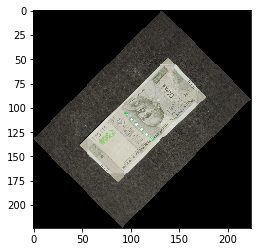

In [0]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(x_t, y_train, test_size=0.2, random_state=2)

temp=X_train_f[3]
plt.imshow(temp)

print(len(X_train_f))

print(len(X_test_f))

print(len(y_train_f))

print(len(y_test_f))

In [0]:
adam=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=custom_vgg_model.fit(X_train_f, y_train_f,
          batch_size=25,
          epochs=15,shuffle=True,verbose=1,validation_data=(X_test_f, y_test_f))

(loss, accuracy) = custom_vgg_model.evaluate(X_test_f, y_test_f, batch_size=50, verbose=1)

print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 277 samples, validate on 70 samples
Epoch 1/15
277/277 [==============================] - 5s 18ms/step - loss: 0.5923 - acc: 0.7292 - val_loss: 0.2813 - val_acc: 0.8714
Epoch 2/15
277/277 [==============================] - 4s 14ms/step - loss: 0.3207 - acc: 0.8195 - val_loss: 0.1799 - val_acc: 0.9286
Epoch 3/15
277/277 [==============================] - 4s 14ms/step - loss: 0.2544 - acc: 0.8664 - val_loss: 0.4264 - val_acc: 0.8286
Epoch 4/15
277/277 [==============================] - 4s 14ms/step - loss: 0.2147 - acc: 0.8953 - val_loss: 0.1455 - val_acc: 0.9143
Epoch 5/15
277/277 [==============================] - 4s 14ms/step - loss: 0.1932 - acc: 0.8773 - val_loss: 0.1648 - val_acc: 0.8571
Epoch 6/15
277/277 [==============================] - 4s 14ms/step - loss: 0.1763 - acc: 0.8773 - val_loss: 0.1417 - val_acc: 0.9000
Epoch 7/15
277/277 [==============================] - 4s 14ms/step - loss: 0.1951 - acc: 0.8700 - val_loss: 0.1287 - val_acc: 0.9429
Epoch 8/15
277/277 [====

In [0]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(15)

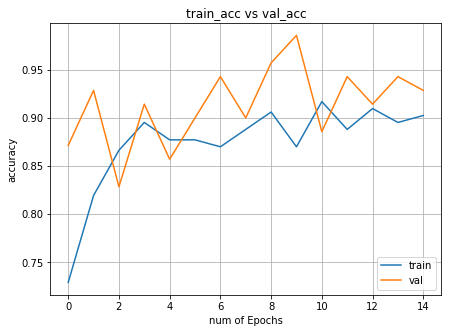

In [0]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [0]:
pred=custom_vgg_model.predict(X_test_f)

from array import *
def array_list(array_num): 
    num_list = array_num.tolist() # list 
    return num_list

pred_metrics=array_list(pred)

In [0]:
max_v=0

pred_final=[]
pred_final_value=[]
for i in range(0,len(pred_metrics)):
    max_v=0
    max_v_index=0
    for j in range(0,len(pred_metrics[i])):
        if pred_metrics[i][j]>max_v:
            max_v=pred_metrics[i][j]
            max_v_index=j
    pred_final_value.append(max_v)
    pred_final.append(max_v_index)

index=[]
for i in range(0,len(X_test_f)):
  index.append(i)

In [0]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test_f]

In [0]:
output=list(zip(index, pred_final , y_classes))

In [0]:
output

[(0, 0, 0),
 (1, 1, 1),
 (2, 0, 0),
 (3, 0, 0),
 (4, 1, 1),
 (5, 0, 0),
 (6, 1, 1),
 (7, 1, 1),
 (8, 0, 0),
 (9, 1, 1),
 (10, 1, 1),
 (11, 1, 1),
 (12, 0, 1),
 (13, 0, 0),
 (14, 0, 0),
 (15, 1, 1),
 (16, 0, 0),
 (17, 1, 1),
 (18, 0, 1),
 (19, 1, 1),
 (20, 0, 0),
 (21, 0, 0),
 (22, 1, 1),
 (23, 1, 1),
 (24, 0, 0),
 (25, 1, 1),
 (26, 0, 0),
 (27, 1, 1),
 (28, 0, 0),
 (29, 1, 1),
 (30, 0, 0),
 (31, 1, 1),
 (32, 0, 0),
 (33, 1, 1),
 (34, 1, 1),
 (35, 1, 1),
 (36, 1, 1),
 (37, 1, 1),
 (38, 0, 0),
 (39, 1, 1),
 (40, 1, 1),
 (41, 0, 0),
 (42, 0, 0),
 (43, 1, 1),
 (44, 0, 1),
 (45, 0, 1),
 (46, 1, 1),
 (47, 1, 1),
 (48, 1, 1),
 (49, 1, 1),
 (50, 0, 0),
 (51, 0, 0),
 (52, 0, 0),
 (53, 0, 0),
 (54, 1, 0),
 (55, 0, 0),
 (56, 0, 0),
 (57, 0, 0),
 (58, 1, 1),
 (59, 1, 1),
 (60, 1, 1),
 (61, 0, 0),
 (62, 1, 1),
 (63, 1, 1),
 (64, 1, 1),
 (65, 1, 1),
 (66, 0, 0),
 (67, 1, 1),
 (68, 0, 0),
 (69, 0, 0)]

In [0]:
result=[]
for i in range(0,len(output)):
  temp_index=output[i][0]
  temp_actual_class=output[i][2]
  temp_pred_class=output[i][1]
  temp_pred=""
  temp_actual=""
  if temp_actual_class==0:
    temp_actual="fake"
  else:
    temp_actual="real"
  if temp_pred_class==0:
    temp_pred="fake"
  else:
    temp_pred="real"    
  result.append("index no. :"+str(temp_index)+"    actual class :"+temp_actual+"    predicted class :"+temp_pred)

In [0]:
result

['index no. :0    actual class :fake    predicted class :fake',
 'index no. :1    actual class :real    predicted class :real',
 'index no. :2    actual class :fake    predicted class :fake',
 'index no. :3    actual class :fake    predicted class :fake',
 'index no. :4    actual class :real    predicted class :real',
 'index no. :5    actual class :fake    predicted class :fake',
 'index no. :6    actual class :real    predicted class :real',
 'index no. :7    actual class :real    predicted class :real',
 'index no. :8    actual class :fake    predicted class :fake',
 'index no. :9    actual class :real    predicted class :real',
 'index no. :10    actual class :real    predicted class :real',
 'index no. :11    actual class :real    predicted class :real',
 'index no. :12    actual class :real    predicted class :fake',
 'index no. :13    actual class :fake    predicted class :fake',
 'index no. :14    actual class :fake    predicted class :fake',
 'index no. :15    actual class :re